# Augumented Images

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
import os
from PIL import Image

def import_images_from_folder(folder_path):
    image_list = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".jpeg"):
                image_list.append(os.path.join(root, file))
    return image_list

# Path to the directories containing normal and pneumonia images
normal_train_path="C:/Users/msais/Downloads/Major_project_T/chest/train/NORMAL"
pneumonia_train_path = "C:/Users/msais/Downloads/Major_project_T/chest/train/PNEUMONIA"

normal_val_path = "C:/Users/msais/Downloads/Major_project_T/chest/val/NORMAL"
pneumonia_val_path = "C:/Users/msais/Downloads/Major_project_T/chest/val/PNEUMONIA"

normal_test_path = "C:/Users/msais/Downloads/Major_project_T/chest/test/NORMAL"
pneumonia_test_path = "C1"

# Import normal and pneumonia images for training
normal_train_images = import_images_from_folder(normal_train_path)
pneumonia_train_images = import_images_from_folder(pneumonia_train_path)

# Import normal and pneumonia images for validation
normal_val_images = import_images_from_folder(normal_val_path)
pneumonia_val_images = import_images_from_folder(pneumonia_val_path)

# Import normal and pneumonia images for testing
normal_test_images = import_images_from_folder(normal_test_path)
pneumonia_test_images = import_images_from_folder(pneumonia_test_path)

# Print the number of images imported for each category
print("Normal Train Images:", len(normal_train_images))
print("Pneumonia Train Images:", len(pneumonia_train_images))

print("Normal Test Images:", len(normal_test_images))
print("Pneumonia Test Images:", len(pneumonia_test_images))

print("Normal Validation Images:", len(normal_val_images))
print("Pneumonia Validation Images:", len(pneumonia_val_images))

Normal Train Images: 3875
Pneumonia Train Images: 3875
Normal Test Images: 390
Pneumonia Test Images: 0
Normal Validation Images: 8
Pneumonia Validation Images: 8


In [3]:
imagePatches = []
for root, dirs, files in os.walk('C:/Users/msais/Downloads/Major_project_T/chest'):
    for file in files:
        if file.endswith('.jpeg'):
            imagePatches.append(os.path.join(root, file))

print(len(imagePatches))


8546


In [4]:
from pathlib import Path

imagePatches = list(Path('C:/Users/msais/Downloads/Major_project_T/chest').glob('**/*.jpeg'))
print(len(imagePatches))


8546


In [5]:
import fnmatch

normal_img = '*NORMAL*'
pneumonia_img = '*PNEUMONIA*'

normal = fnmatch.filter(imagePatches, normal_img)
pneumonia = fnmatch.filter(imagePatches, pneumonia_img)

# balancing the normal classe with pneumonia 

In [6]:
print("number of normal images : ",len(normal))
print("number of pneumonial images : ",len(pneumonia))

number of normal images :  4273
number of pneumonial images :  4273


# Resizing the images to 224 x 224 and normalizing

In [7]:
img_list = []
label_list = []

for img in imagePatches:
    if img is None:
        continue
    #temp_image = cv2.imread(img)
    temp_image = cv2.imread(str(img))

    im = cv2.resize(temp_image, (224, 224), interpolation=cv2.INTER_CUBIC)
    im = im.astype(np.float32)/255.
    img_list.append(im)
    if img in normal:
        label_list.append(0)
    elif img in pneumonia:
        label_list.append(1)
img_list = np.array(img_list)
label_list = np.array(label_list)

In [8]:
print("shape of the image : ",img_list.shape)
print("length of the new upsampled image : ",len(img_list))
print("shape of the label : ",len(label_list))

shape of the image :  (8546, 224, 224, 3)
length of the new upsampled image :  8546
shape of the label :  8546


In [9]:
print(len(pneumonia))
print(len(normal))

4273
4273


# Test Train split(70 train , 30 test)

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(img_list, label_list, test_size=0.3, random_state=101, stratify=label_list)


y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# del img_list, label_list

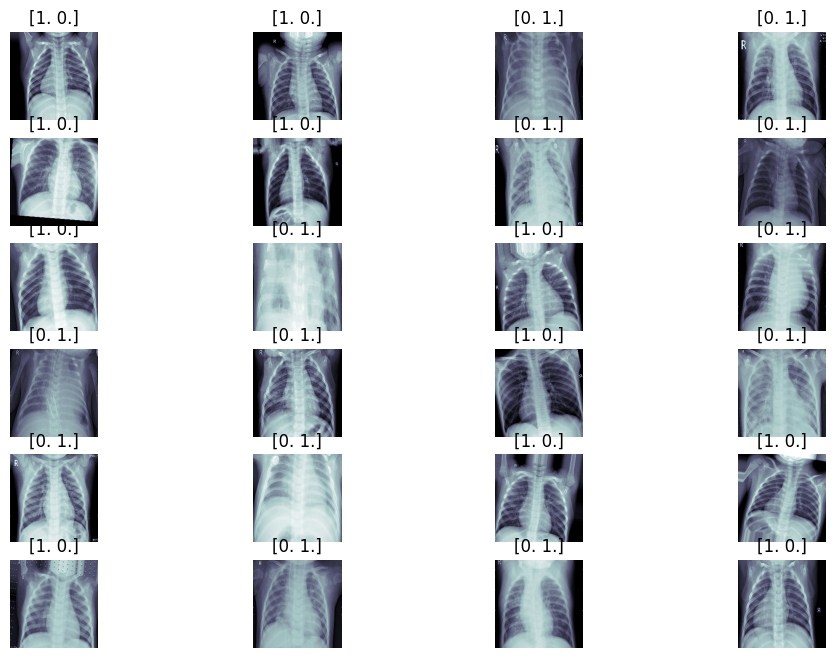

In [11]:
import matplotlib.pyplot as plt
fig, m_axs = plt.subplots(6, 4, figsize = (12, 8))
for (c_x, c_y, c_ax) in zip(x_test, y_test, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone')
    c_ax.set_title(str(c_y))
    c_ax.axis('off')

In [12]:
# config the session 
import tensorflow as tf

os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(111)

tf.random.set_seed(111) #seeding for same type of output when run multiple times
from random import seed
seed(111)

# building the Cnn model for feature extraction

In [13]:
from keras import layers, Model, backend
channel_axis = -1
def model1():
    img_input = layers.Input(shape = (224, 224, 3))
    # block 1
    x = layers.Conv2D(32, (3,3),padding = 'same', use_bias = False)(img_input)
    x = layers.BatchNormalization(axis = channel_axis)(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(32, (3,3),padding = 'same', use_bias = False)(x)
    x = layers.BatchNormalization(axis = channel_axis)(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2),strides=(2, 2),padding='same')(x)

    # block 2
    x = layers.Conv2D(64, (3,3),padding = 'same', use_bias = False)(x)
    x = layers.BatchNormalization(axis = channel_axis)(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(64, (3,3),padding = 'same', use_bias = False)(x)
    x = layers.BatchNormalization(axis = channel_axis)(x)
    x = layers.Activation('relu', name = 'block2_act2')(x)
    x = layers.MaxPooling2D((2, 2),strides=(2, 2),padding='same')(x)

    # block 3
    x = layers.Conv2D(128, (3,3),padding = 'same', use_bias = False)(x)
    x = layers.BatchNormalization(axis = channel_axis)(x)
    x = layers.Activation('relu', name = 'block3_act1')(x)
    x = layers.Conv2D(128, (3,3),padding = 'same', use_bias = False)(x)
    x = layers.BatchNormalization(axis = channel_axis)(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3),strides=(3, 3),padding='same')(x)
    
    # block 4
    x = layers.Conv2D(256, (3,3),padding = 'same', use_bias = False)(x)
    x = layers.BatchNormalization(axis = channel_axis)(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(128, (3,3),padding = 'same', use_bias = False)(x)
    x = layers.BatchNormalization(axis = channel_axis)(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3),strides=(3, 3),padding='same')(x)

    # block 5
    x = layers.Conv2D(1024, (3,3),padding = 'same', use_bias = False)(x)
    x = layers.BatchNormalization(axis = channel_axis)(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(512, (3,3),padding = 'same', use_bias = False)(x)
    x = layers.Dropout(0.4, name = 'block4_dropout')(x)
    x = layers.BatchNormalization(axis = channel_axis)(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3),strides=(3, 3),padding='same')(x)
    
    x = layers.Flatten(name='flatten')(x)

    x = layers.Dense(1024, activation='relu')(x)
    x = layers.BatchNormalization(axis = channel_axis)(x)
    x = layers.Dense(1024, activation='relu')(x)

    features = layers.Dense(1024, activation="relu", name="features")(x)
    model = Model(inputs=img_input, outputs=features)

    return model

features = model1()
print("Output shape after the CNN Architecture:", features.output_shape)

Output shape after the CNN Architecture: (None, 1024)


In [14]:
features.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 32)        │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 64)        │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 64)        │          36,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_act2 (Activation)             │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 128)         │          73,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_act1 (Activation)             │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │         147,4

 Total params: 13,607,008 (51.91 MB)

 Trainable params: 13,600,224 (51.88 MB)

 Non-trainable params: 6,784 (26.50 KB)

In [15]:
out_features = features.predict(img_list)
print("Features from the input dataset: ",out_features.shape)

268/268 ━━━━━━━━━━━━━━━━━━━━ 122s 452ms/step
Features from the input dataset:  (8546, 1024)


# Standardizing 1024 features

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard_features = scaler.fit_transform(out_features)
print("Features after Standardization: ",standard_features.shape)

Features after Standardization:  (8546, 1024)


# Reducing features by PCA

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=512)
reduced_features = pca.fit_transform(standard_features)

# Print the shape of reduced features
print("Shape of reduced features:", reduced_features.shape)

Shape of reduced features: (8546, 512)


# Giving Features to Classifiers

## 1.SVM Classifier

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
X_train, X_test, y_train, y_test = train_test_split(reduced_features, label_list, test_size=0.2, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=101)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=101)

In [21]:
# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.96
Confusion Matrix:
[[828  35]
 [ 34 813]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       863
           1       0.96      0.96      0.96       847

    accuracy                           0.96      1710
   macro avg       0.96      0.96      0.96      1710
weighted avg       0.96      0.96      0.96      1710



## SVM with different Kernals

In [22]:
# Define a list of SVM classifiers with different kernels
svm_classifiers = {
    'Linear SVM': SVC(kernel='linear', random_state=101),
    'Polynomial SVM': SVC(kernel='poly', degree=3, random_state=101),
    'RBF SVM': SVC(kernel='rbf', random_state=101)
}

# Train each SVM classifier and evaluate its performance
for name, svm_classifier in svm_classifiers.items():
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")


Linear SVM - Accuracy: 0.9596
Confusion Matrix:
[[828  35]
 [ 34 813]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       863
           1       0.96      0.96      0.96       847

    accuracy                           0.96      1710
   macro avg       0.96      0.96      0.96      1710
weighted avg       0.96      0.96      0.96      1710



Polynomial SVM - Accuracy: 0.9474
Confusion Matrix:
[[813  50]
 [ 40 807]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       863
           1       0.94      0.95      0.95       847

    accuracy                           0.95      1710
   macro avg       0.95      0.95      0.95      1710
weighted avg       0.95      0.95      0.95      1710



RBF SVM - Accuracy: 0.9444
Confusion Matrix:
[[830  33]
 [ 62 785]]
Classification Report:
              precision    recall  f1-score   support

    

## Random Forest Classifier

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
# Create a Random Forest classifier with default hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=101)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [25]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate confusion matrix and classification report

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8994
Confusion Matrix:
[[817  46]
 [126 721]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.90       863
           1       0.94      0.85      0.89       847

    accuracy                           0.90      1710
   macro avg       0.90      0.90      0.90      1710
weighted avg       0.90      0.90      0.90      1710



## XG boost Classifier

In [26]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [27]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

model2 = xgb.XGBClassifier(objective='multi:softmax', num_class=2)

# Train the model
model2.fit(X_train, y_train)

# Make predictions
y_pred = model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.947953216374269


In [28]:
# Generate confusion matrix and classification report

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[828  35]
 [ 54 793]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       863
           1       0.96      0.94      0.95       847

    accuracy                           0.95      1710
   macro avg       0.95      0.95      0.95      1710
weighted avg       0.95      0.95      0.95      1710



## GradientBoosting Classifier

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

model3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9321637426900585


In [30]:
# Generate confusion matrix and classification report

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[805  58]
 [ 58 789]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       863
           1       0.93      0.93      0.93       847

    accuracy                           0.93      1710
   macro avg       0.93      0.93      0.93      1710
weighted avg       0.93      0.93      0.93      1710



## LDA Classifier

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
lda.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lda.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9614035087719298


In [32]:
# Generate confusion matrix and classification report

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[823  40]
 [ 26 821]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       863
           1       0.95      0.97      0.96       847

    accuracy                           0.96      1710
   macro avg       0.96      0.96      0.96      1710
weighted avg       0.96      0.96      0.96      1710



## Decision tree Classifier 

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8368421052631579


In [34]:
# Generate confusion matrix and classification report

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[736 127]
 [152 695]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       863
           1       0.85      0.82      0.83       847

    accuracy                           0.84      1710
   macro avg       0.84      0.84      0.84      1710
weighted avg       0.84      0.84      0.84      1710



# Ensemble methods

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize individual classifiers
svm_classifier = SVC()
xgb_classifier = XGBClassifier()
gb_classifier = GradientBoostingClassifier()
lda_classifier = LinearDiscriminantAnalysis()

# Train individual classifiers
svm_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)
gb_classifier.fit(X_train, y_train)
lda_classifier.fit(X_train, y_train)

# Make predictions using individual classifiers
svm_preds = svm_classifier.predict(X_test)
xgb_preds = xgb_classifier.predict(X_test)
gb_preds = gb_classifier.predict(X_test)
lda_preds = lda_classifier.predict(X_test)

# Combine predictions for each classifier into a feature matrix
ensemble_X = [svm_preds, xgb_preds, gb_preds, lda_preds]
ensemble_X = np.array(ensemble_X).T

# Train a Random Forest meta-classifier on the combined predictions
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(ensemble_X, y_test)

# Make predictions using the ensemble of classifiers
ensemble_preds = rf_classifier.predict(ensemble_X)

# Evaluate the performance of the ensemble classifier
accuracy = accuracy_score(y_test, ensemble_preds)
print("Accuracy of the ensemble classifier:", accuracy)

Accuracy of the ensemble classifier: 0.9649122807017544


In [36]:
# Generate confusion matrix and classification report

conf_matrix = confusion_matrix(y_test, ensemble_preds)
class_report = classification_report(y_test, ensemble_preds)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[839  24]
 [ 36 811]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       863
           1       0.97      0.96      0.96       847

    accuracy                           0.96      1710
   macro avg       0.97      0.96      0.96      1710
weighted avg       0.96      0.96      0.96      1710



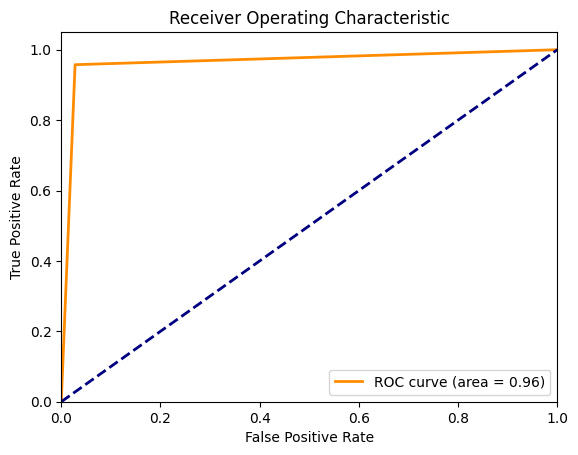

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have trained the individual classifiers and created the ensemble as in your code

# Combine predictions for each classifier into a feature matrix
ensemble_X = [svm_preds, xgb_preds, gb_preds, lda_preds]
ensemble_X = np.array(ensemble_X).T

# Train a Random Forest meta-classifier on the combined predictions
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(ensemble_X, y_test)

# Make predictions using the ensemble of classifiers
ensemble_preds = rf_classifier.predict(ensemble_X)

# Calculate ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, ensemble_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
